In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
import tensorflow as tf
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [4]:
df=pd.read_csv('Signal (1).csv')


In [5]:
df

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
duplicate = df[df.duplicated()]

In [7]:
duplicate

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [8]:
df.drop_duplicates(subset=None, keep='first', inplace=True,ignore_index=False)

In [9]:
duplicate = df[df.duplicated()]
duplicate

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1359 non-null   float64
 1   Parameter 2      1359 non-null   float64
 2   Parameter 3      1359 non-null   float64
 3   Parameter 4      1359 non-null   float64
 4   Parameter 5      1359 non-null   float64
 5   Parameter 6      1359 non-null   float64
 6   Parameter 7      1359 non-null   float64
 7   Parameter 8      1359 non-null   float64
 8   Parameter 9      1359 non-null   float64
 9   Parameter 10     1359 non-null   float64
 10  Parameter 11     1359 non-null   float64
 11  Signal_Strength  1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [11]:
df.shape

(1359, 12)

In [12]:
df['Signal_Strength'].unique()

array([5, 6, 7, 4, 8, 3])

In [13]:
df.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
df.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

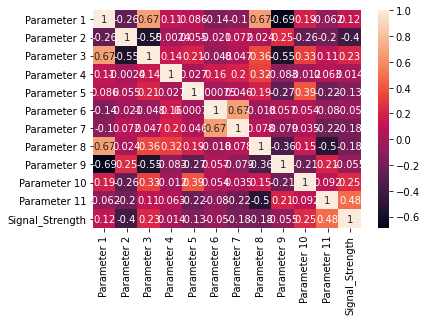

In [15]:
sns.heatmap(df.corr(),annot=True)

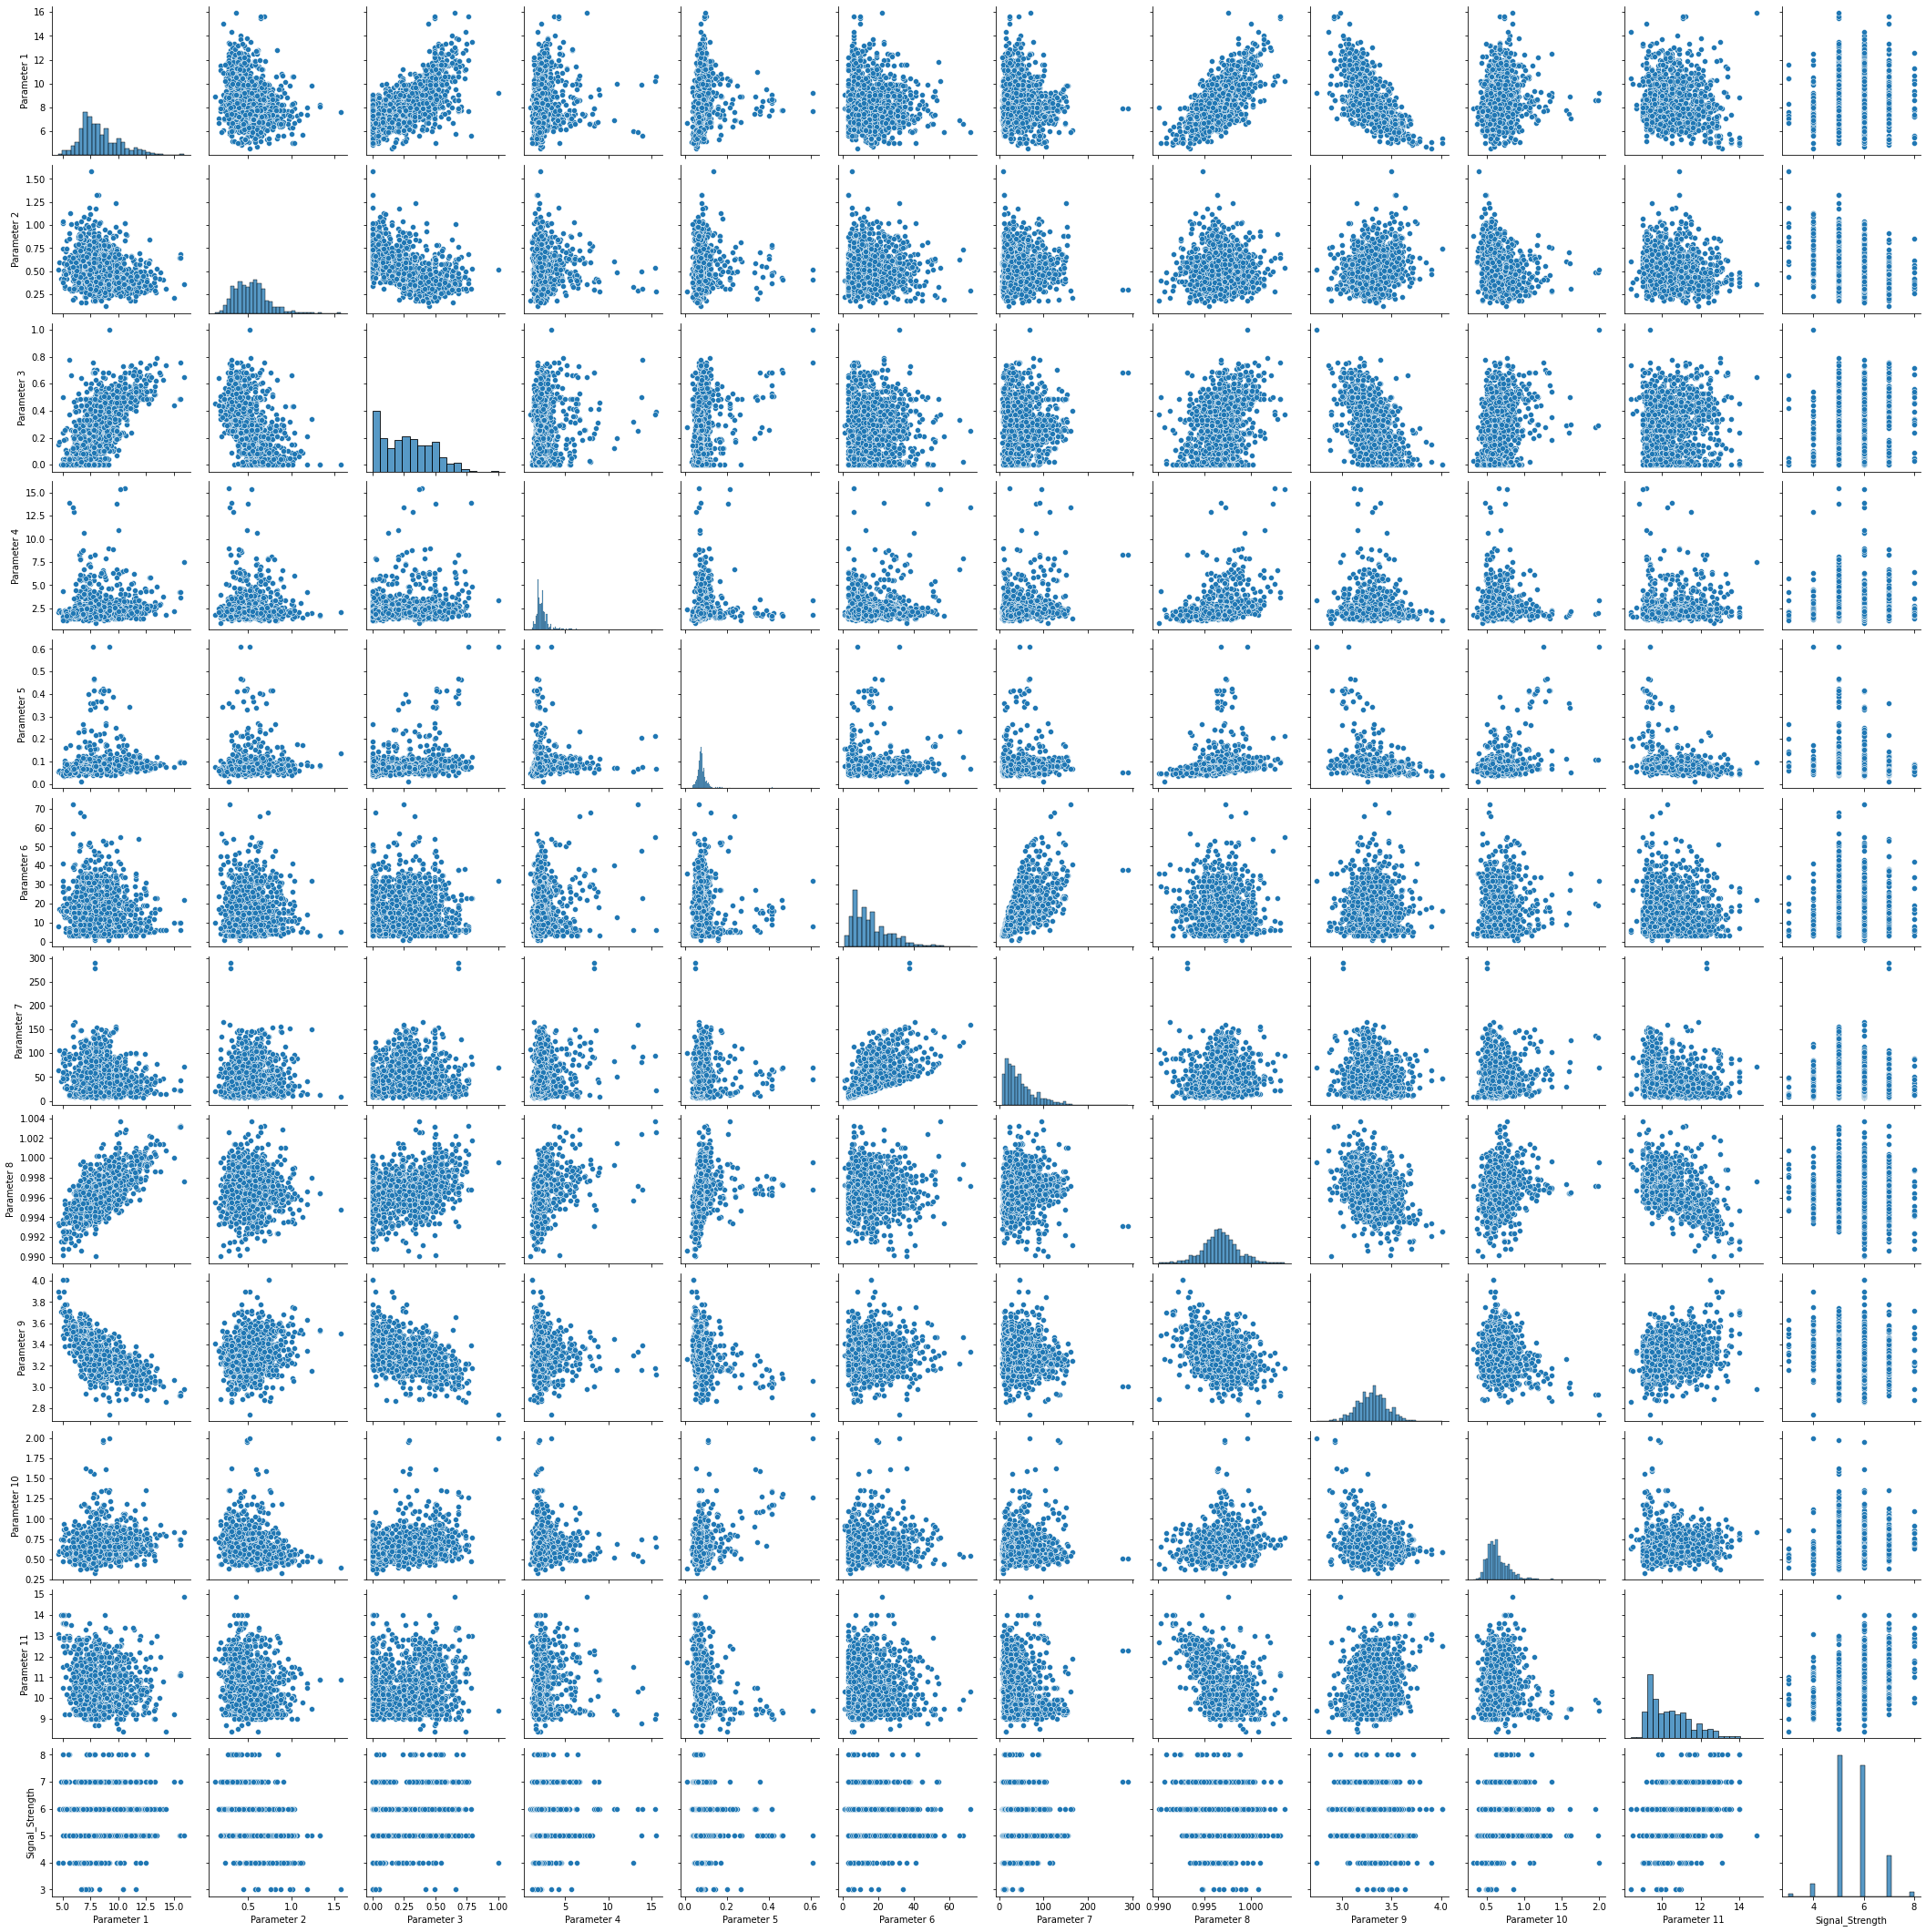

In [18]:
sns.pairplot(df)

In [16]:
features=df.drop('Signal_Strength',axis=1)
# features=df[['Parameter 11','Parameter 10','Parameter 3','Parameter 2']]
target=df['Signal_Strength']

In [17]:
df['Signal_Strength'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.2, random_state = 43)

In [24]:
transformer = Normalizer()
train_x = transformer.fit_transform(X_train)
X=transformer.fit_transform(features)

In [25]:
#Initialize Sequential Graph (model)
model = tf.keras.Sequential()

#Add Dense layer for prediction - Keras declares weights and bias automatically
model.add(tf.keras.layers.Dense(1, input_shape=(11,)))

#Compile the model - add Loss and Gradient Descent optimizer
model.compile(optimizer='sgd', loss='mse')

In [26]:
test_x = transformer.transform(X_test)

In [27]:
model.fit(train_x, y_train,validation_data=(test_x, y_test),batch_size=3,epochs=200)

Epoch 1/200
363/363 [==============================] - 1s 1ms/step - loss: 5.7495 - val_loss: 0.6986
Epoch 2/200
363/363 [==============================] - 0s 1ms/step - loss: 0.7618 - val_loss: 0.6562
Epoch 3/200
363/363 [==============================] - 0s 1ms/step - loss: 0.6966 - val_loss: 0.6347
Epoch 4/200
363/363 [==============================] - 0s 1ms/step - loss: 0.6465 - val_loss: 0.6272
Epoch 5/200
363/363 [==============================] - 0s 1ms/step - loss: 0.6141 - val_loss: 0.6152
Epoch 6/200
363/363 [==============================] - 0s 1ms/step - loss: 0.6815 - val_loss: 0.6088
Epoch 7/200
363/363 [==============================] - 0s 1ms/step - loss: 0.6111 - val_loss: 0.6203
Epoch 8/200
363/363 [==============================] - 0s 1ms/step - loss: 0.6508 - val_loss: 0.6065
Epoch 9/200
363/363 [==============================] - 0s 1ms/step - loss: 0.5952 - val_loss: 0.6028
Epoch 10/200
363/363 [==============================] - 0s 995us/step - loss: 0.6465 - val_

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.get_weights()

[array([[ 1.0171391 ],
        [-3.6878889 ],
        [ 2.525764  ],
        [-0.10029508],
        [ 0.05421585],
        [ 1.5371954 ],
        [ 1.3418605 ],
        [-0.59169203],
        [-3.9839888 ],
        [ 1.2936224 ],
        [ 2.4220514 ]], dtype=float32), array([3.5360882], dtype=float32)]

In [30]:
df['Signal_Strength'].unique()

array([5, 6, 7, 4, 8, 3])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.2, random_state = 43)

In [32]:
X_train.shape

(1087, 11)

In [33]:
trainY = tf.keras.utils.to_categorical(y_train)
testY = tf.keras.utils.to_categorical(y_test)



In [34]:
trainY.shape

(1087, 9)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [35]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

# model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

# model.add(tf.keras.layers.Dense(50, activation='sigmoid'))

model.add(tf.keras.layers.Dense(20, activation='sigmoid'))

# model.add(tf.keras.layers.Dense(16, activation='sigmoid'))

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(9, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(X_train, trainY,
          validation_data=(X_test, testY), 
          epochs=200,
          batch_size=20)

Epoch 1/200
55/55 [==============================] - 1s 5ms/step - loss: 2.0976 - accuracy: 0.2450 - val_loss: 1.7055 - val_accuracy: 0.5110
Epoch 2/200
55/55 [==============================] - 0s 2ms/step - loss: 1.6166 - accuracy: 0.4355 - val_loss: 1.4250 - val_accuracy: 0.4743
Epoch 3/200
55/55 [==============================] - 0s 2ms/step - loss: 1.4159 - accuracy: 0.4619 - val_loss: 1.3033 - val_accuracy: 0.5037
Epoch 4/200
55/55 [==============================] - 0s 2ms/step - loss: 1.3529 - accuracy: 0.5012 - val_loss: 1.2433 - val_accuracy: 0.5257
Epoch 5/200
55/55 [==============================] - 0s 2ms/step - loss: 1.3056 - accuracy: 0.5238 - val_loss: 1.2031 - val_accuracy: 0.5735
Epoch 6/200
55/55 [==============================] - 0s 2ms/step - loss: 1.2737 - accuracy: 0.5302 - val_loss: 1.1758 - val_accuracy: 0.5772
Epoch 7/200
55/55 [==============================] - 0s 2ms/step - loss: 1.1972 - accuracy: 0.5505 - val_loss: 1.1568 - val_accuracy: 0.5846
Epoch 8/200
5

In [55]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_7 (Batch (None, 11)                44        
_________________________________________________________________
dense_22 (Dense)             (None, 9)                 108       
Total params: 152
Trainable params: 130
Non-trainable params: 22
_________________________________________________________________
